### **Import Necessary Libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from scipy import stats
import warnings

In [2]:
warnings.filterwarnings('ignore')

### **Load The Dataset**

In [3]:
data = pd.read_excel("Wine Quality Dataset.xlsx")

In [4]:
data.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
150,7.3,0.330,0.47,2.1,0.077,5.0,11.0,0.99580,3.33,0.53,10.3,6.0
801,8.6,0.550,0.09,3.3,0.068,8.0,17.0,0.99735,3.52,0.44,10.0,5.0
1454,11.7,0.450,0.63,2.2,0.073,7.0,23.0,0.99974,3.52,0.69,10.9,6.0
32,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.99660,3.17,0.66,9.8,5.0
877,7.7,0.715,0.01,2.1,0.064,31.0,43.0,0.99371,3.52,0.57,11.8,6.0
1137,10.4,0.520,0.45,2.0,0.080,6.0,13.0,0.99774,3.52,0.76,11.4,6.0
1387,7.4,0.640,0.07,1.8,0.100,8.0,23.0,0.99610,3.52,0.58,9.6,5.0
1076,9.9,0.320,0.56,2.0,0.073,3.0,8.0,0.99534,3.52,0.73,11.4,6.0
1265,7.2,0.570,0.05,2.3,0.081,16.0,36.0,0.99564,3.52,0.60,10.3,6.0
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.0,4.0


In [5]:
data.shape

(1599, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


### **Handling Null Values**

In [7]:
null_values = data.isnull().sum()
null_columns = data.columns[null_values > 0]
for i in null_columns:
    data[i].fillna(data[i].mean(), inplace=True)

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### **Creating Good Quality Column**

The goodquality column is created to understand better classification of good quality wine and bad quality wine with the help of the quality indicator value

In [9]:
data['goodquality'] = [1 if x >= 7 else 0 for x in data['quality']]

In [10]:
data.head(-1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.52,0.82,9.5,6.0,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0,0


### **Handling Outliers**

The outlier is handled in the dataset to increase the model performance and accuracy 

The outlier is detected using the Z-score of each column and each data point

The condition is to ***Keep data points where Z-score < 3***

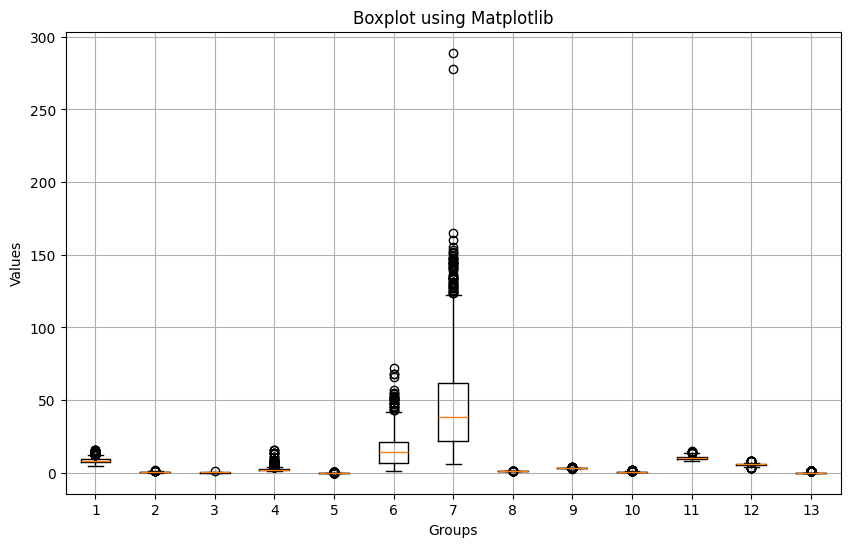

In [11]:
plt.figure(figsize=(10, 6))
plt.boxplot(data)
plt.title('Boxplot using Matplotlib')
plt.xlabel('Groups')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [12]:
z_scores = np.abs(stats.zscore(data.select_dtypes(include=np.number)))
filtered_entries = (z_scores < 3).all(axis=1)  
data = data[filtered_entries]

### **Feature Extraction/Finding X and Y Variables**

In [13]:
x = data.drop(columns=["quality", "goodquality"])
y1 = data["quality"]
y2 = data["goodquality"]

### **Feature Scaling of X Variable**

In [14]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

### **Train Test Split of data for Regression model**

In [15]:
x_train, x_test, y_train, y_test_linear = train_test_split(x_scaled, y1, test_size=0.2, random_state=42)

### **Training and Prediction of Regression Model**

In [16]:
model_linear = LinearRegression()

In [17]:
model_linear.fit(x_train, y_train)

LinearRegression()

In [18]:
y_pred_linear = model_linear.predict(x_test)

### **Evaluating the Regression Model Performance**

In [19]:
mse = mean_squared_error(y_pred_linear, y_test_linear)
r2 = r2_score(y_test_linear, y_pred_linear)
print(f'R2 Score: {r2:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

R2 Score: 0.34
Mean Squared Error: 0.41


### **Analysis of the Results**

**R² Score (Coefficient of Determination): 0.34**

An R² score of 0.34 means that only 34% of the variance in the target variable (quality) can be explained by the model using the input features.

This relatively low R² score suggests that the linear regression model is not capturing much of the underlying relationship between the features and the
target variable. 

There is likely a lot of unexplained variance, implying that other factors or non-linear relationships are influencing the target variable.

**Mean Squared Error (MSE): 0.41**

It quantifies the variance of the residuals (errors).

An MSE of 0.41 means that, on average, the square of the difference between the predicted quality and the actual quality is 0.41.

A lower MSE indicates a better fit to the data. However, an MSE of 0.41 suggests that there is a moderate amount of error in the predictions. 

The model's predictions are not very accurate, considering the variance that remains unaccounted for.


### **Training and Prediction of Classification Model**

In [20]:
x_train, x_test, y_train, y_test_class = train_test_split(x_scaled, y2, test_size=0.2, random_state=42)

In [21]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5)

In [22]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [23]:
model = grid_search.best_estimator_

In [24]:
y_pred_class = model.predict(x_test)

### **Evaluating the Classification Model Performance**

In [25]:
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.86


### **Analysis of the Result**

An accuracy score of 0.86 is generally considered high, suggesting that the model is performing well on the classification task. For many applications, this level of accuracy would be acceptable and indicate that the model is effective at distinguishing between the classes (e.g., good quality vs. not good quality wine).

With an accuracy of 86%, the model is making errors on 14% of the predictions. Depending on the application, this could be acceptable or might need further improvement.

If the classes in the dataset are balanced (i.e., there is an approximately equal number of samples in each class), an accuracy of 0.86 is likely a good indicator of performance.

If the dataset is imbalanced (e.g., one class has significantly more samples than the other), accuracy alone may not be a reliable measure of model performance. In such cases, metrics like precision, recall, F1-score, or the area under the ROC curve (AUC-ROC) provide a more complete picture of how well the model is performing.

### **Custom Input Prediction**

In [26]:
custom_input = [[9.8,0.50,0.34,2.3,0.094,10.0,45.0,0.99864,3.52,0.60,9.7]]
custom_input_scaled = scaler.transform(custom_input)

In [27]:
quality = model_linear.predict(custom_input_scaled)
goodquality = model.predict(custom_input_scaled)

In [28]:
if goodquality == 0:
    print(f'The quality of the wine is {quality[0]:.2f} and it is not good quality wine since its quality indicator is low. '
          'So it is not recommendable to drink.')
else:
    print(f'The quality of the wine is {quality[0]:.2f} and it is good quality wine since its quality indicator is great. '
          'You can have a sip of it.')

The quality of the wine is 5.40 and it is not good quality wine since its quality indicator is low. So it is not recommendable to drink.


### **Plot The Predicted Values vs Actual Values**

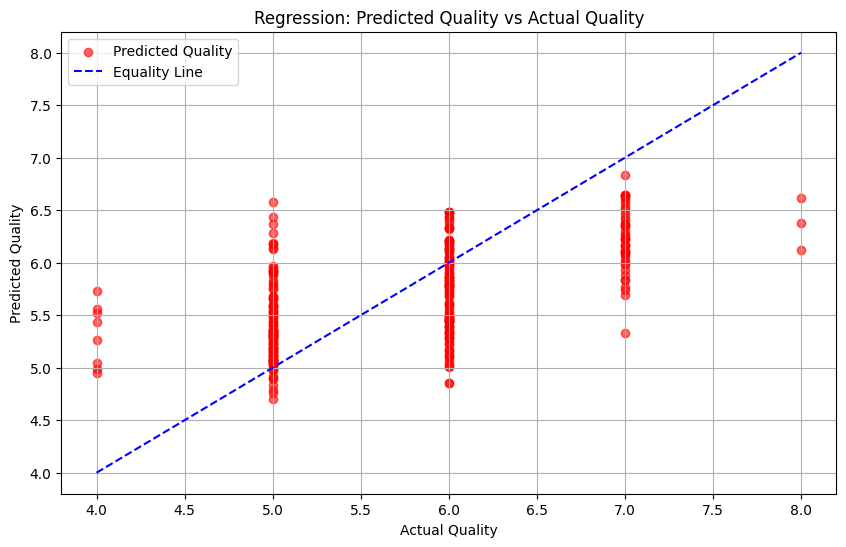

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_linear, y_pred_linear, color='r', alpha=0.6, label='Predicted Quality')
plt.plot([min(y_test_linear), max(y_test_linear)], [min(y_test_linear), max(y_test_linear)], color='b', linestyle='--', label='Equality Line')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Regression: Predicted Quality vs Actual Quality')
plt.legend()
plt.grid(True)
plt.show()

### **Analysis of the Results**

The scatter points exhibit a general upward trend, indicating that as the actual quantity increases, the predicted quantity also tends to increase. However, there is a degree of variability around the trend line, suggesting that the model is not perfectly accurate in its predictions.

The equality line serves as a benchmark. Points that fall close to this line represent accurate predictions.The extent to which the scatter points deviate from the line indicates the model's error.

There seem to be clusters or bands of points, suggesting that the model might be more accurate for certain ranges of actual quantities than others.

<Figure size 800x600 with 0 Axes>

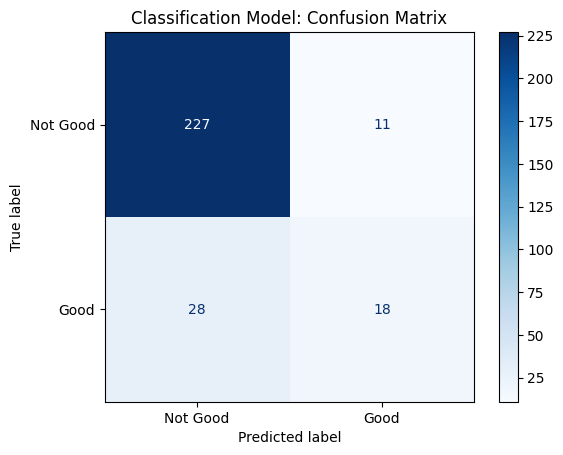

In [30]:
cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Good', 'Good'])

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title('Classification Model: Confusion Matrix')
plt.show()

### **Analysis of the Results**

### **Breakdown of the Confusion Matrix**

| True Label | Predicted Label | Count |
|------------|-----------------|-------|
| Not Good   | Not Good        | 227   |
| Not Good   | Good            | 11    |
| Good       | Not Good        | 28    |
| Good       | Good            | 18    |

Based on these metrics, we can calculate various performance indicators:

| Metric      | Value |
|-------------|-------|
| Accuracy    | ≈ 0.87|
| Precision   | ≈ 0.62|
| Recall      | ≈ 0.39|
| F1-score    | ≈ 0.49|


### **Interpretation**

**Accuracy:** The overall correctness of the model. In this case, the model is approximately 87% accurate.

**Precision:** The proportion of positive predictions that are actually correct. The model's precision is relatively low, indicating that it often predicts "Good" when it shouldn't.

**Recall:** The proportion of actual positive cases that the model correctly identifies. The model's recall is also low, suggesting that it misses many "Good" cases.

**F1-score:** The harmonic mean of precision and recall, providing a balanced measure. The F1-score is low, reflecting the model's weaknesses in both precision and recall.


Based on the confusion matrix and derived metrics, the model appears to be moderately accurate overall, but it struggles to correctly classify "Good" instances. 
Improving the model's ability to identify "Good" cases would likely lead to a significant improvement in its overall performance.

